In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [2]:
from torch import nn

class FashionMNISTNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
        )
        self.l2 = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
        )
        self.l3 = nn.Sequential(
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.l3(self.l2(self.l1(x)))
        return logits

In [3]:
class FashionMNISTNetwork(nn.Module):
    
    def __init__(self):
        super(FashionMNISTNetwork, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [6]:
from ogo import ExperimentDescription, generate_experiment, model_train_step, model_test

description = ExperimentDescription(
    model=FashionMNISTNetwork,
    loss=nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    optimizer_params={"lr": 1e-3},
    dataset_train=training_data,
    dataset_test=test_data,
    batch_size=128,
    epochs=10,
    model_copies_epochs=1,
    model_copies_submodules=[["layer1"], ["layer2"], ["fc1"], ["fc2", "fc3"]],
    model_reference_device="cuda",
    model_general_device="cuda",
    model_copies_devices=["cuda","cuda","cuda","cuda"],
    model_train_step=model_train_step,
    model_test=model_test
)

experiment = generate_experiment(description)

In [10]:
from ogo import experiment_train_reference

experiment_train_reference(experiment)
# experiment.model_reference.history

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\ivans\AppData\Local\pypoetry\Cache\virtualenvs\experiments-0w4_GPqJ-py3.12\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
 10%|█         | 1/10 [00:09<01:23,  9.24s/it]

{'accuracy': 87.91, 'loss': 0.3253603954858418}


 20%|██        | 2/10 [00:18<01:14,  9.28s/it]

{'accuracy': 88.79, 'loss': 0.31895303537573994}


 30%|███       | 3/10 [00:27<01:04,  9.24s/it]

{'accuracy': 90.06, 'loss': 0.2764297504968281}


 40%|████      | 4/10 [00:37<00:55,  9.27s/it]

{'accuracy': 90.14, 'loss': 0.2805524583481535}


 50%|█████     | 5/10 [00:46<00:46,  9.25s/it]

{'accuracy': 90.09, 'loss': 0.2847663335785081}


 60%|██████    | 6/10 [00:55<00:36,  9.20s/it]

{'accuracy': 90.23, 'loss': 0.27417849164597596}


 70%|███████   | 7/10 [01:04<00:27,  9.19s/it]

{'accuracy': 91.02, 'loss': 0.26133936388960366}


 80%|████████  | 8/10 [01:13<00:18,  9.13s/it]

{'accuracy': 90.14999999999999, 'loss': 0.28136231250400784}


 90%|█████████ | 9/10 [01:22<00:09,  9.13s/it]

{'accuracy': 90.79, 'loss': 0.28849066265776185}


100%|██████████| 10/10 [01:31<00:00,  9.17s/it]

{'accuracy': 91.41, 'loss': 0.27355715755043153}


In [8]:
from ogo import experiment_train_general

experiment_train_general(experiment)
# experiment.model_general.history

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\ivans\AppData\Local\pypoetry\Cache\virtualenvs\experiments-0w4_GPqJ-py3.12\Lib\site-packages\torch\nn\functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


{'accuracy': 34.03, 'loss': 2.11623311646377}
{'accuracy': 78.94, 'loss': 1.075902820387973}
{'accuracy': 86.11999999999999, 'loss': 0.42124378982978533}
{'accuracy': 84.78999999999999, 'loss': 0.42574848215791244}
best: ['fc1']


 10%|█         | 1/10 [00:37<05:37, 37.45s/it]

{'accuracy': 86.11999999999999, 'loss': 0.42124378982978533}
{'accuracy': 88.34, 'loss': 0.33968740531915353}
{'accuracy': 88.48, 'loss': 0.3274298025460183}
{'accuracy': 87.66000000000001, 'loss': 0.37351258910154994}
{'accuracy': 87.49, 'loss': 0.3592701786303822}
best: ['layer2']


 20%|██        | 2/10 [01:14<04:58, 37.36s/it]

{'accuracy': 88.48, 'loss': 0.3274298025460183}
{'accuracy': 89.64, 'loss': 0.2929821474642693}
{'accuracy': 89.34, 'loss': 0.2940092780922033}
{'accuracy': 85.07000000000001, 'loss': 0.5079092147606837}
{'accuracy': 89.2, 'loss': 0.31541666181027134}
best: ['layer1']


 30%|███       | 3/10 [01:52<04:23, 37.64s/it]

{'accuracy': 89.64, 'loss': 0.2929821474642693}
{'accuracy': 89.84, 'loss': 0.29192363102979296}
{'accuracy': 89.58, 'loss': 0.2973957769101179}
{'accuracy': 86.38, 'loss': 0.4269616081367565}
{'accuracy': 89.12, 'loss': 0.31561744081068643}
best: ['layer1']


 40%|████      | 4/10 [02:30<03:47, 37.84s/it]

{'accuracy': 89.84, 'loss': 0.29192363102979296}
{'accuracy': 89.92, 'loss': 0.2919271814672253}
{'accuracy': 89.83, 'loss': 0.2952901702138442}
{'accuracy': 87.14, 'loss': 0.3962921194637878}
{'accuracy': 89.64999999999999, 'loss': 0.2964686549539807}
best: ['layer1']


 50%|█████     | 5/10 [03:08<03:08, 37.73s/it]

{'accuracy': 89.92, 'loss': 0.2919271814672253}
{'accuracy': 89.94, 'loss': 0.28967248884182945}
{'accuracy': 89.46, 'loss': 0.29585633775855924}
{'accuracy': 88.58, 'loss': 0.3637058172799364}
{'accuracy': 88.52, 'loss': 0.32177655700641344}
best: ['layer1']


 60%|██████    | 6/10 [03:45<02:30, 37.60s/it]

{'accuracy': 89.94, 'loss': 0.28967248884182945}
{'accuracy': 89.75999999999999, 'loss': 0.2927723962672149}
{'accuracy': 89.64, 'loss': 0.2886078427486782}
{'accuracy': 87.32, 'loss': 0.39899535081054593}
{'accuracy': 89.33, 'loss': 0.3074871200738074}
best: ['layer2']


 70%|███████   | 7/10 [04:23<01:52, 37.65s/it]

{'accuracy': 89.64, 'loss': 0.2886078427486782}
{'accuracy': 89.98, 'loss': 0.28403529468216476}
{'accuracy': 89.56, 'loss': 0.2920239473445506}
{'accuracy': 86.86, 'loss': 0.4338406765762764}
{'accuracy': 89.78, 'loss': 0.29104419524156594}
best: ['layer1']


 80%|████████  | 8/10 [05:00<01:15, 37.51s/it]

{'accuracy': 89.98, 'loss': 0.28403529468216476}
{'accuracy': 90.05, 'loss': 0.27999336036700234}
{'accuracy': 89.3, 'loss': 0.30548549773572364}
{'accuracy': 88.91, 'loss': 0.3443425903214684}
{'accuracy': 89.12, 'loss': 0.3028871628302562}
best: ['layer1']


 90%|█████████ | 9/10 [05:38<00:37, 37.49s/it]

{'accuracy': 90.05, 'loss': 0.27999336036700234}
{'accuracy': 90.31, 'loss': 0.27710176721403873}
{'accuracy': 89.83, 'loss': 0.293283988026124}
{'accuracy': 89.57000000000001, 'loss': 0.3196370108406755}
{'accuracy': 90.07, 'loss': 0.2870435760934142}
best: ['layer1']


100%|██████████| 10/10 [06:15<00:00, 37.51s/it]

{'accuracy': 90.31, 'loss': 0.27710176721403873}


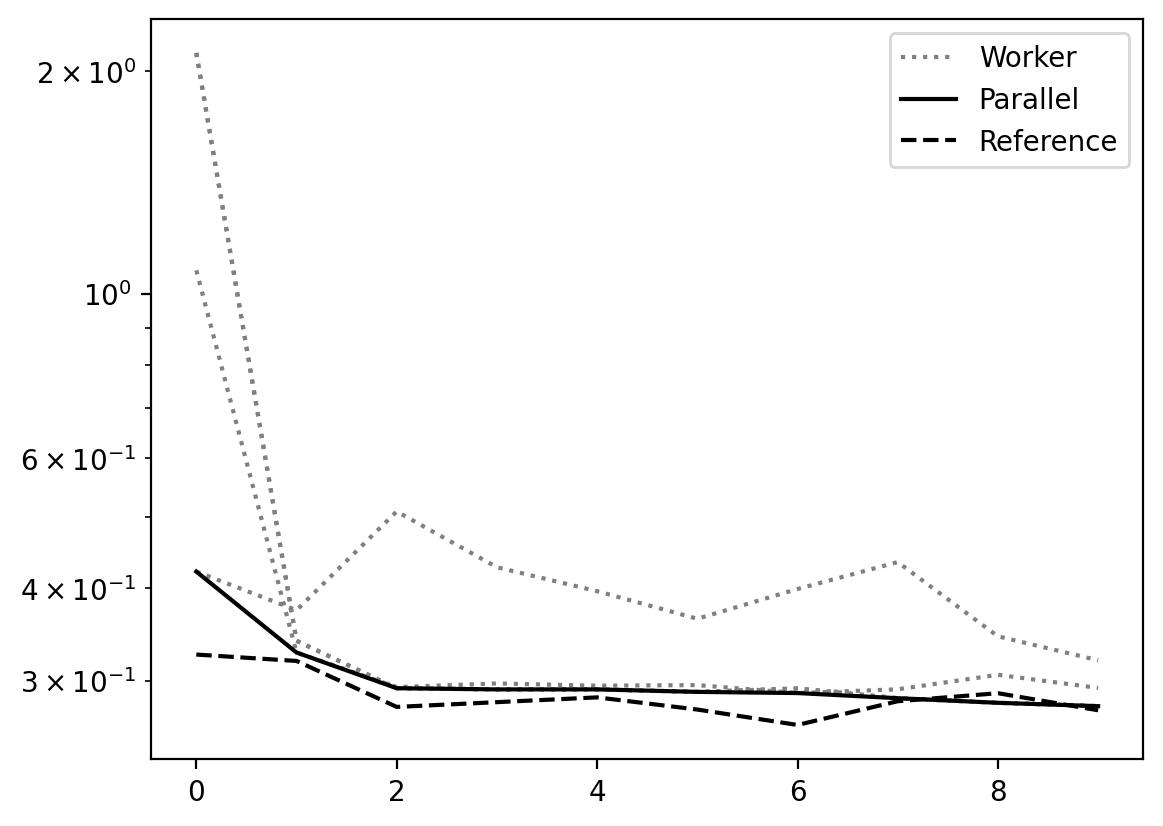

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

start = 0
stop = experiment.epochs
x = range(start, stop)
copy_step = 1
general_step = 1
reference_step = 1

# for m in experiment.model_copies:
#     plt.plot(x, [x["loss"] for x in m.history[start:stop:copy_step]], linestyle='dotted', color='gray')

plt.plot(x, [x["loss"] for x in experiment.model_copies[0].history[start:stop:copy_step]], linestyle='dotted', color='gray', label='Worker')

for m in experiment.model_copies[:-1]:
    plt.plot(x, [x["loss"] for x in m.history[start:stop:copy_step]], linestyle='dotted', color='gray')

plt.plot(x, [x["loss"] for x in experiment.model_general.history[start:stop:general_step]], label='Parallel', color='black', linestyle='solid')
plt.plot(x, [x["loss"] for x in experiment.model_reference.history[start:stop:reference_step]], label='Reference', color='black', linestyle='dashed')

plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
experiment.model_reference.history[-1]